# About this data set 🧠 
#### This dataset contains extensive health information for 2,149 patients, each uniquely identified with IDs ranging from 4751 to 6900. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. The data is ideal for researchers and data scientists looking to explore factors associated with Alzheimer's, develop predictive models, and conduct statistical analyses.

# Question: Can we use this data to predict who will get Alzheimer's Disease?

# Alzheimer’s Disease (CDC Data)

### The number of older adults with Alzheimer’s disease is expected to nearly triple over the next 40 years

### Among people ages 65 and older, the largest percentage of those with the diseases were African Americans (14 percent), followed by Hispanics (12 percent), and non-Hispanic whites (10 percent).


# CDC Graphic
<div style="width: 500px;">
<img src="https://www.cdc.gov/aging/publications/images/alzheimers-disease-dementia_900px.png?_=86223" alt="Image Description">
</div>

# Why this project

#### I chose to focus on Alzheimer's disease prediction because of the profound impact it has had on people close to me. A friend of mine shared her journey as her mother developed Alzheimer's, and watching that unfold over the years made me realize how hard this disease is—not just on the person living with it, but on their entire family. I also saw my own aunt go through it, and seeing the toll it took on my cousins was heartbreaking. It’s a disease that strips away the very basic abilities we take for granted, leaving loved ones unsure how to help.

#### My connection to this topic goes even further back. My mom worked as a CNA and often cared for elderly individuals, and as a child, I remember visiting care facilities and wondering why the people there couldn't leave. It wasn’t until I grew older that I realized how diseases like Alzheimer’s confine people, not just physically but mentally. I’ve always carried that with me, and this project became a way to understand more about the disease and how data science might offer hope for earlier intervention or better care.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset: 🧠 Alzheimer's Disease Dataset 🧠

In [2]:
df = pd.read_csv("alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
df.shape

(2149, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

## Prepare and Clean the Data
#### Remove rows with missing values from the DataFrame df

In [5]:
df = df.dropna()

#### Remove the columns "PatientID" and "DoctorInCharge" from the DataFrame df and then displays the first few rows of the modified DataFrame.

In [6]:
df = df.drop(["PatientID", "DoctorInCharge"], axis=1)

df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [7]:
df.shape

(2149, 33)

In [8]:
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

# Feature Engineering: Enhancing Data for Machine Learning

#### Convert the categorical column "Ethnicity" in the DataFrame df into numerical columns representing each unique ethnicity.

In [9]:
#One-Hot Encode Ethnicity

df = pd.get_dummies(df, columns=["Ethnicity"], dtype=int)

In [10]:
df.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,73,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,...,0,0,0,1,0,0,1,0,0,0
1,89,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,...,0,0,0,0,1,0,1,0,0,0
2,73,0,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,...,0,1,0,1,0,0,0,0,0,1
3,74,1,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,...,0,0,0,0,0,0,1,0,0,0
4,89,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,...,0,0,1,1,0,0,1,0,0,0


In [11]:
#Create new feature for Average Overall health, combine PhysicalActivity, DietQuality, and SleepQuality
#into a new feature to capture the overall health individuals

df['OverallHealth'] = (df['PhysicalActivity'] + df['DietQuality'] + df['SleepQuality']) / 3

In [12]:
df.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,OverallHealth
0,73,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,...,0,0,1,0,0,1,0,0,0,5.566668
1,89,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,...,0,0,0,1,0,1,0,0,0,5.096648
2,73,0,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,...,1,0,1,0,0,0,0,0,1,6.448299
3,74,1,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,...,0,0,0,0,0,1,0,0,0,8.085386
4,89,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,...,0,1,1,0,0,1,0,0,0,4.234399


In [13]:
df = df.drop(["PhysicalActivity", "DietQuality", "SleepQuality"], axis=1)

df.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,...,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,OverallHealth
0,73,0,2,22.927749,0,13.297218,0,0,1,1,...,0,0,1,0,0,1,0,0,0,5.566668
1,89,0,0,26.827681,0,4.542524,0,0,0,0,...,0,0,0,1,0,1,0,0,0,5.096648
2,73,0,1,17.795882,0,19.555085,1,0,0,0,...,1,0,1,0,0,0,0,0,1,6.448299
3,74,1,1,33.800817,1,12.209266,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8.085386
4,89,0,0,20.716974,0,18.454356,0,0,0,0,...,0,1,1,0,0,1,0,0,0,4.234399


In [14]:
#Create new feature for Simple Average of OveralLifestyle, combine BMI, Smoking, and AlcoholConsumption into a new feature to capture the overall lifestyle of individuals
df['OveralLifestyle'] = (df['BMI'] + df['Smoking'] + df['AlcoholConsumption']) / 3

In [15]:
df = df.drop(["BMI", "Smoking", "AlcoholConsumption"], axis=1)

In [16]:
df.head()

,Age,Gender,EducationLevel,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,...,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,OverallHealth,OveralLifestyle
0,73,0,2,0,0,1,1,0,0,142,...,0,1,0,0,1,0,0,0,5.566668,12.074989
1,89,0,0,0,0,0,0,0,0,115,...,0,0,1,0,1,0,0,0,5.096648,10.456735
2,73,0,1,1,0,0,0,0,0,99,...,0,1,0,0,0,0,0,1,6.448299,12.450322
3,74,1,1,0,0,0,0,0,0,118,...,0,0,0,0,1,0,0,0,8.085386,15.670028
4,89,0,0,0,0,0,0,0,0,94,...,1,1,0,0,1,0,0,0,4.234399,13.057110


In [17]:
df['OverallHealth'].unique()

array([5.56666848, 5.09664814, 6.44829887, ..., 7.92516346, 5.31352773,
       8.13036926])

# Explore the Data
#### The scatter plot shows how age relates to overall health, with blue points for Alzheimer's cases and orange points for healthy individuals. Overlapping points are made transparent for better viewing.

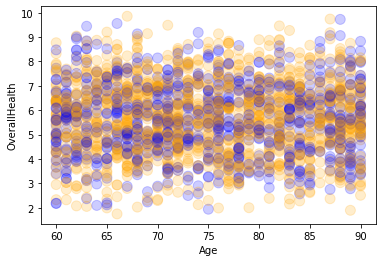

In [18]:
fig, ax = plt.subplots()

# Add titles to the axes
plt.xlabel("Age")
plt.ylabel("OverallHealth")


# Create a color array based on the Diagnosis, blue means they have Alzheimer's
colors = ['blue' if diagnosis == 1 else 'orange' for diagnosis in df['Diagnosis']]

# Plot the scatter plot with conditional colors
ax.scatter(df['Age'], df['OverallHealth'], alpha=.2, s=100, c=colors)

plt.show()

In [19]:
df['Age'].unique()

array([73, 89, 74, 86, 68, 75, 72, 87, 78, 84, 64, 69, 63, 65, 82, 77, 71,
       83, 79, 67, 66, 70, 85, 60, 88, 62, 81, 61, 80, 90, 76])

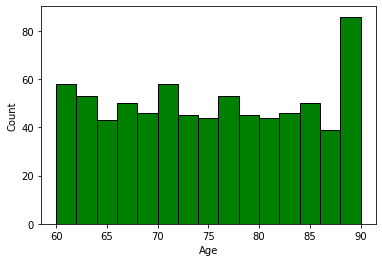

In [20]:
fig, ax = plt.subplots()

# Add titles to the axes
plt.xlabel("Age")
plt.ylabel("Count")

ax.hist(df.loc[df['Diagnosis'] == 1, "Age"], color='green', edgecolor='black',  bins=15);

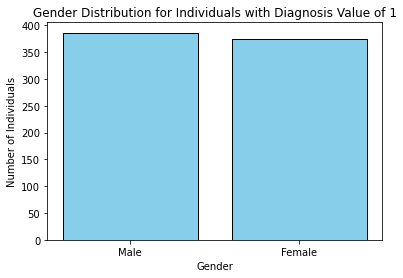

In [21]:
# Filter the dataframe for rows where Diagnosis is 1
df_filtered = df[df['Diagnosis'] == 1]

# Count the occurrences of each gender within the filtered dataframe
gender_counts = df_filtered['Gender'].value_counts()

# Map the numeric values to their corresponding gender labels
gender_labels = {0: 'Male', 1: 'Female'}
gender_counts.index = gender_counts.index.map(gender_labels)

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(gender_counts.index, gender_counts.values, color='skyblue', edgecolor='black')

# Add labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Individuals')
ax.set_title('Gender Distribution for Individuals with Diagnosis Value of 1')

plt.show()

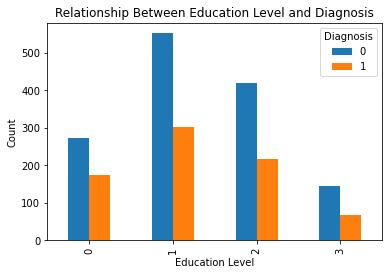

In [22]:
# Group the data by EducationLevel and count the occurrences of each Diagnosis
grouped_data = df.groupby('EducationLevel')['Diagnosis'].value_counts().unstack()

# Create a bar chart
grouped_data.plot(kind='bar')

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Relationship Between Education Level and Diagnosis')

# Show the plot
plt.show()

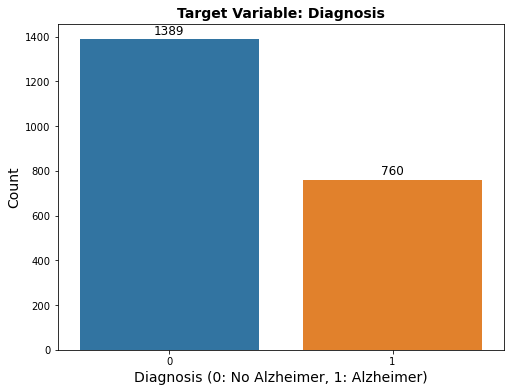

In [23]:
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 

# Create a count plot for the Diagnosis variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=df)

# Adding title and labels with enhanced formatting
plt.title('Target Variable: Diagnosis', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis (0: No Alzheimer, 1: Alzheimer)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding count numbers on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')

# Display the plot
plt.grid(False)
plt.show()

## Notes for below Heatmap: 

Darker blue: Negative correlation, meaning as one variable increases, the other decreases.
Lighter blue: Weaker negative correlation.
Light green: Weaker positive correlation.
Darker green: Positive correlation, meaning as one variable increases, the other also increases.

<AxesSubplot:>

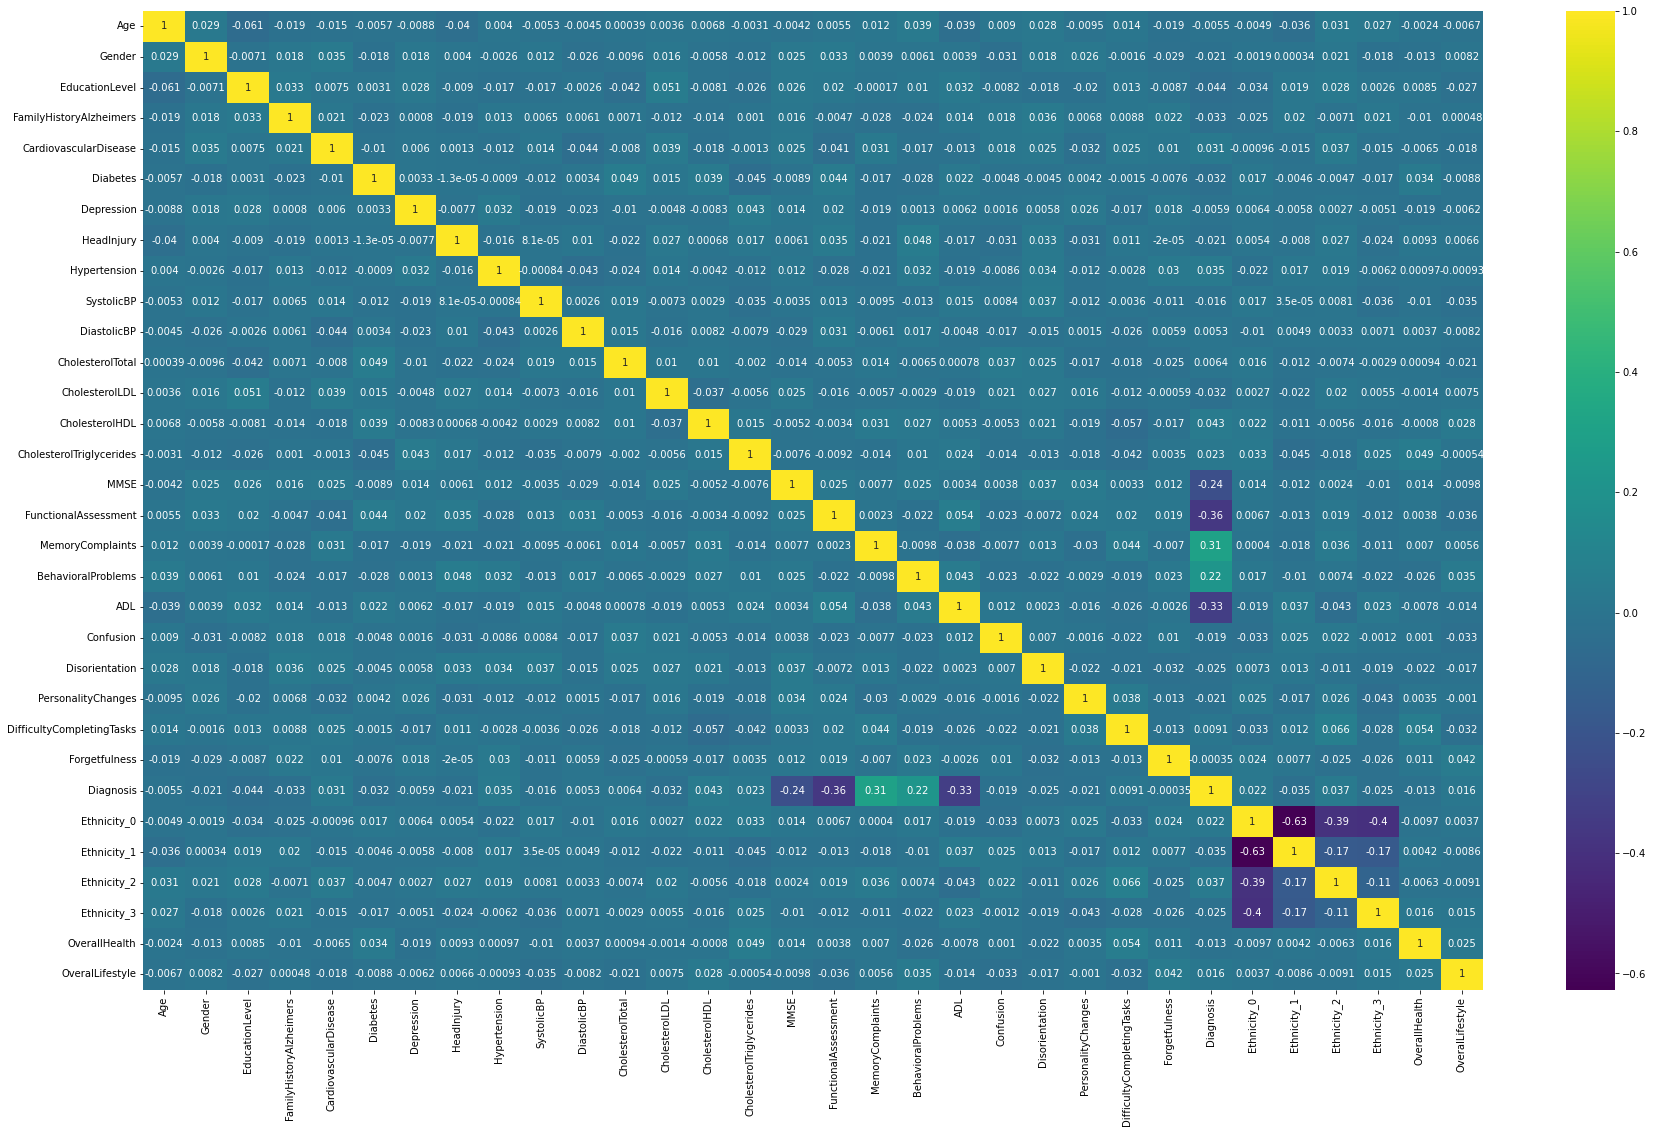

In [24]:
# Calculate the correlation matrix and create the heatmap
plt.figure(figsize=(30, 18))  # Adjust the width and height as needed

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

## Move the target variable so that it is the last feature.

In [25]:
# move the target variable Diagnosis to the end
feature_order = [feature for feature in list(df.columns) if feature not in ["Diagnosis"]] + ["Diagnosis"]

df = df[feature_order]

df.head()

,Age,Gender,EducationLevel,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,...,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,OverallHealth,OveralLifestyle,Diagnosis
0,73,0,2,0,0,1,1,0,0,142,...,0,1,0,1,0,0,0,5.566668,12.074989,0
1,89,0,0,0,0,0,0,0,0,115,...,0,0,1,1,0,0,0,5.096648,10.456735,0
2,73,0,1,1,0,0,0,0,0,99,...,0,1,0,0,0,0,1,6.448299,12.450322,0
3,74,1,1,0,0,0,0,0,0,118,...,0,0,0,1,0,0,0,8.085386,15.670028,0
4,89,0,0,0,0,0,0,0,0,94,...,1,1,0,1,0,0,0,4.234399,13.057110,0


# Prepare for Machine Learning

In [26]:
# Capital X indicates all of the features that the algorithm will be given to learn from.
# This code X = df.iloc[:, :-1].values takes all the features except the last one from the DataFrame df
X = df.iloc[:, :-1].values

# Lowercase y indicates the target variable, the classifications that you would like to predict.  
y = df.iloc[:, -1].values

In [27]:
# Preview the first 10 rows

X[:10]

array([[7.30000000e+01, 0.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.42000000e+02, 7.20000000e+01, 2.42366840e+02,
        5.61508970e+01, 3.36825635e+01, 1.62189143e+02, 2.14635324e+01,
        6.51887697e+00, 0.00000000e+00, 0.00000000e+00, 1.72588346e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.56666848e+00, 1.20749890e+01],
       [8.90000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.15000000e+02, 6.40000000e+01, 2.31162595e+02,
        1.93407996e+02, 7.90284773e+01, 2.94630909e+02, 2.06132673e+01,
        7.11869550e+00, 0.00000000e+00, 0.00000000e+00, 2.59242413e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       

In [28]:
from sklearn.model_selection import train_test_split

#Specifies that 25% of the data should be used for testing, while the remaining 75% is used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [29]:
# Standardize the features so that they are all on the same scale (between -3 and 3)

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()

# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train_std, y_train, scoring='accuracy', cv=10)

In [32]:
# Show how the model performed over the 10 folds

scores

array([0.86419753, 0.8757764 , 0.80124224, 0.86335404, 0.88198758,
       0.85093168, 0.8136646 , 0.76397516, 0.85093168, 0.86335404])

In [33]:
# Show the mean of the 10 folds

scores.mean()

0.8429414922168545

In [34]:
# 10-fold cross validation with a list of algorithms

classifiers = [log_reg, knn, svm, forest]

model_scores = [cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10) for clf in classifiers]
model_scores

[array([0.86419753, 0.8757764 , 0.80124224, 0.86335404, 0.88198758,
        0.85093168, 0.8136646 , 0.76397516, 0.85093168, 0.86335404]),
 array([0.77160494, 0.68322981, 0.74534161, 0.72670807, 0.72049689,
        0.70807453, 0.70186335, 0.67080745, 0.73291925, 0.75776398]),
 array([0.84567901, 0.88819876, 0.80124224, 0.88198758, 0.83229814,
        0.85093168, 0.85714286, 0.72049689, 0.86335404, 0.86956522]),
 array([0.95061728, 0.92546584, 0.95031056, 0.92546584, 0.95031056,
        0.93167702, 0.91925466, 0.9068323 , 0.91925466, 0.94409938])]

In [35]:
# use a DataFrame to view the cross validation results

models_df = pd.DataFrame(data=model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "SVM", "Forest"])
models_df

,1,2,3,4,5,6,7,8,9,10
LR,0.864198,0.875776,0.801242,0.863354,0.881988,0.850932,0.813665,0.763975,0.850932,0.863354
KNN,0.771605,0.683230,0.745342,0.726708,0.720497,0.708075,0.701863,0.670807,0.732919,0.757764
SVM,0.845679,0.888199,0.801242,0.881988,0.832298,0.850932,0.857143,0.720497,0.863354,0.869565
Forest,0.950617,0.925466,0.950311,0.925466,0.950311,0.931677,0.919255,0.906832,0.919255,0.944099


In [36]:
models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.864198,0.875776,0.801242,0.863354,0.881988,0.850932,0.813665,0.763975,0.850932,0.863354,0.842941
KNN,0.771605,0.683230,0.745342,0.726708,0.720497,0.708075,0.701863,0.670807,0.732919,0.757764,0.721881
SVM,0.845679,0.888199,0.801242,0.881988,0.832298,0.850932,0.857143,0.720497,0.863354,0.869565,0.841090
Forest,0.950617,0.925466,0.950311,0.925466,0.950311,0.931677,0.919255,0.906832,0.919255,0.944099,0.932329


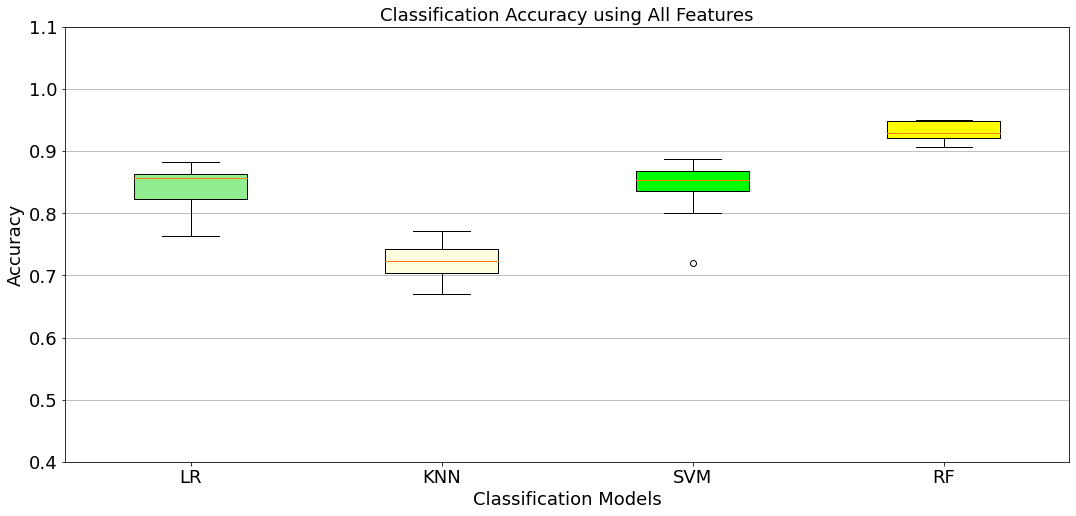

In [37]:
# BOXPLOT - visually comparing performance of the models

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))

# rectangular box plot
# place the cross-validated model_scores list from above
# into bplot_models here ------->
                           ##############
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)
                           ##############
    
# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=['LR', 'KNN', 'SVM', 'RF'])

# increase tick size
y_ticks = axes.get_yticklabels()
x_ticks = axes.get_xticklabels()

for x in x_ticks: 
    x.set_fontsize(18)       
for y in y_ticks:
    y.set_fontsize(18)

In [38]:
# standardize X (the full dataset)
    # using the mean and standard deviation from the training set
    
X_std = stdsc.fit_transform(X)
y = df.iloc[:, -1].values

forest.fit(X_std, y);

In [39]:
from sklearn.linear_model import LogisticRegression

# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train);

#### Training accuracy: Helps understand how well the model fits the training data.

In [40]:
log_reg.score(X_train_std, y_train)

0.8553693358162632

#### Test accuracy: Evaluates the model's ability to generalize to new data and helps detect overfitting.

In [41]:
log_reg.score(X_test_std, y_test)

0.8271375464684015